In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('/content/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.shape

(1338, 7)

In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-3625584562.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


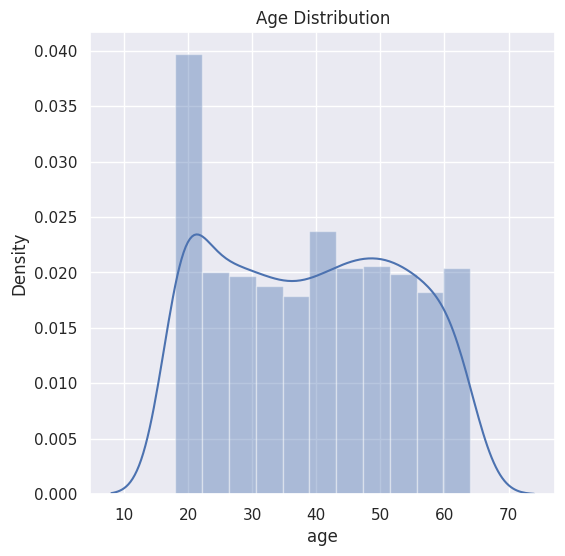

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.title('Age Distribution')
plt.show()

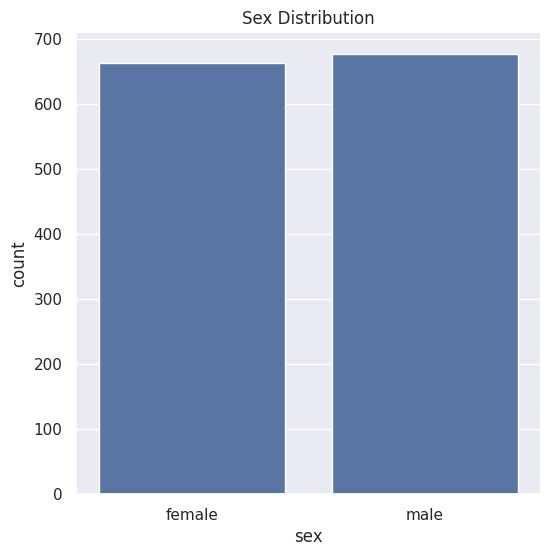

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
dataset['sex'].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-958553461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['bmi'])


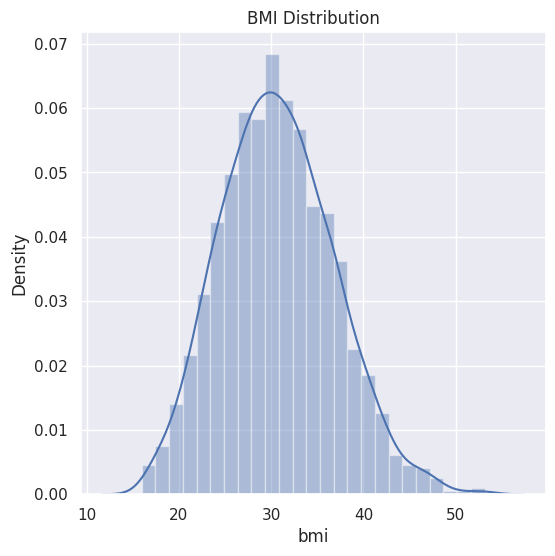

In [11]:
#g BMI distribution
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

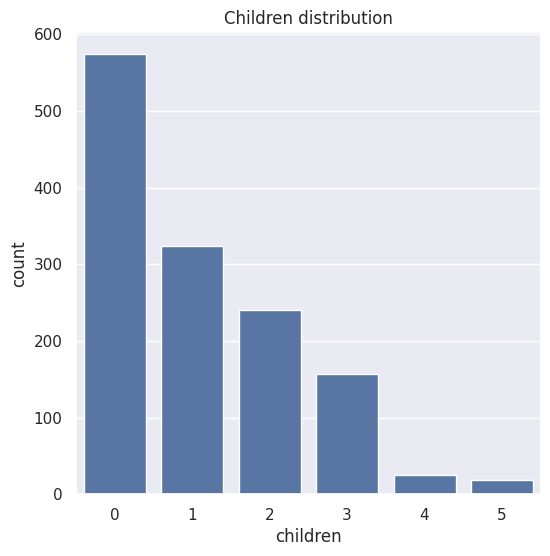

In [14]:
# children column distribution
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=dataset)
plt.title('Children distribution')
plt.show()

In [16]:
dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [18]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

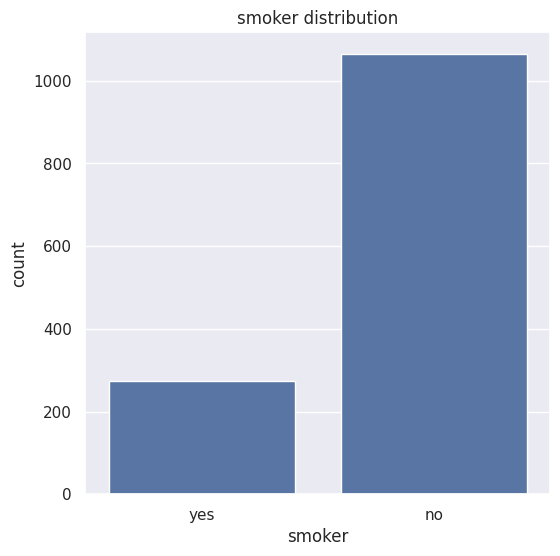

,count
smoker,
no,1064
yes,274


In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=dataset)
plt.title('smoker distribution')
plt.show()
dataset['smoker'].value_counts()

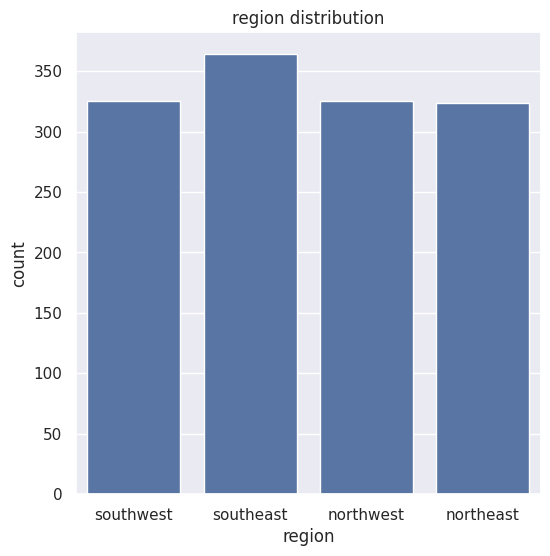

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=dataset)
plt.title('region distribution')
plt.show()
dataset['region'].value_counts()

/tmp/ipython-input-1857459146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['charges'])


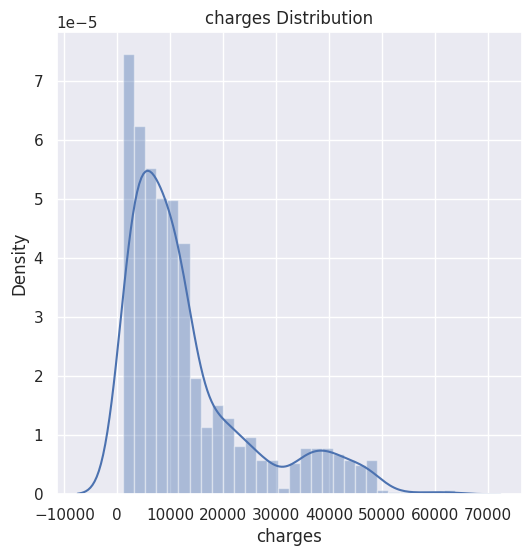

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['charges'])
plt.title('charges Distribution')
plt.show()

Data Preprocessing

In [23]:
# Encoding the categorical column
dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

/tmp/ipython-input-1746403773.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipython-input-1746403773.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipython-input-1746403773.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, 

In [24]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Spliting the data in train and test dataset

In [25]:
X = dataset.drop(columns='charges',axis=1)
Y = dataset['charges']

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Tranining

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evalutation

In [29]:
traning_data_prediction = regressor.predict(X_train)

In [30]:
# r square value
r2_train = metrics.r2_score(Y_train,traning_data_prediction)

In [33]:
print("Train Data prediction: ",r2_train)

Train Data prediction:  0.751505643411174


In [34]:
# prediction of test data
test_data_prediction = regressor.predict(X_test)

In [35]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print("Test data prediction: ",r2_test)

Test data prediction:  0.7447273869684076


Predictive system

In [37]:
input_data = (31,1,25.74,0,1,0)

# change input into numpy arrary
input_as_numpy = np.asarray(input_data)

# reshape the array
input_data_reshape = input_as_numpy.reshape(1,-1)

prediction = regressor.predict(input_data_reshape)
print('The prediction is : ', prediction[0])

The prediction is :  3760.080576496057


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
